In [1]:
# from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:

print("accessing dataset...")
# ((trainX, trainY), (testX, testY)) = mnist.load_data()
# trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
# testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# trainX = trainX.astype("float32") / 255.0
# testX = testX.astype("float32") / 255.0

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape((x_train.shape[0], 1*28*28))
x_test_nonreshape = x_test
x_test = x_test.reshape((x_test.shape[0], 1*28*28))

accessing dataset...


In [3]:
model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
# model.add(Dense(128, activation="sigmoid"))
# model.add(Dense(10, activation="softmax"))
model.add(Dense(256, input_shape=(784,), activation='relu'))
#last layer
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [4]:
# train the model using SGD
print("[INFO] training network...")
# sgd = SGD(0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10)

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6384 - accuracy: 0.8400
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2499 - accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2267 - accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2081 - accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1925 - accuracy: 0.9465
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1793 - accuracy: 0.9501
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1678 - accuracy: 0.9536
Epoch 10/10
1875/1875 [==============================] 

In [5]:
test_loss, accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(accuracy)

313/313 [==============================] - 0s 892us/step - loss: 0.1546 - accuracy: 0.9563
0.1545710563659668
0.9563000202178955


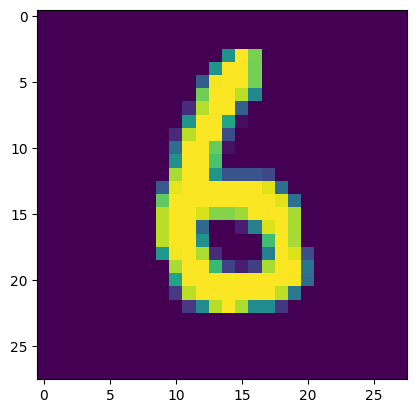

Predicted Value is: 6 


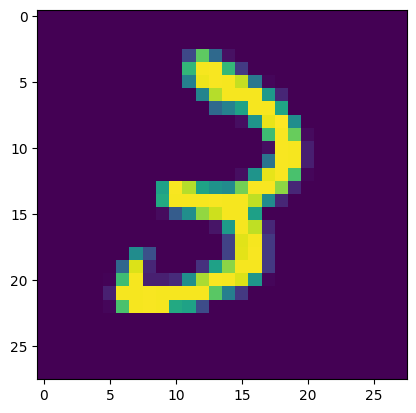

Predicted Value is: 3 


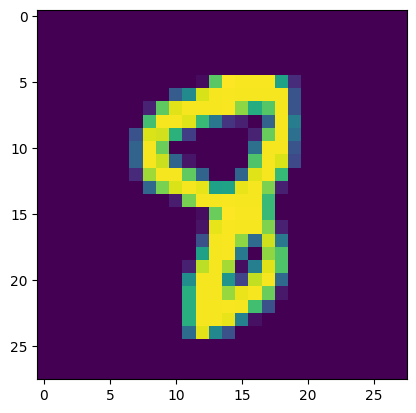

Predicted Value is: 8 


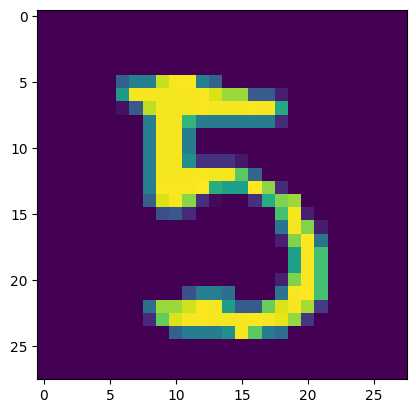

Predicted Value is: 5 


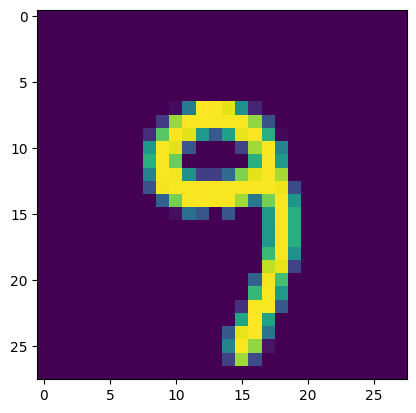

Predicted Value is: 9 


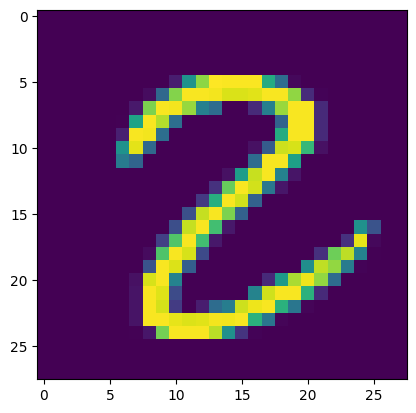

Predicted Value is: 2 


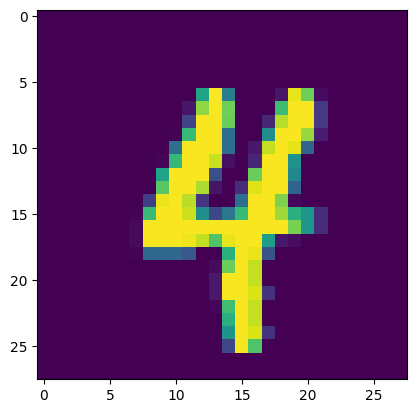

Predicted Value is: 4 


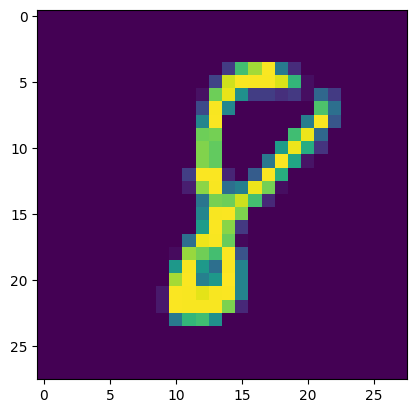

Predicted Value is: 8 


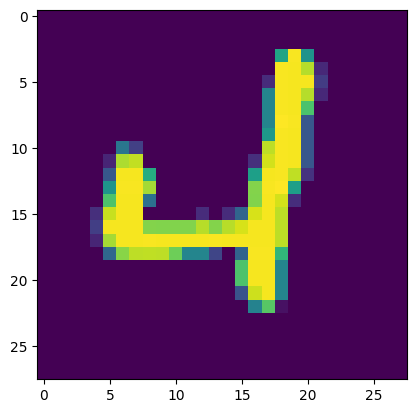

Predicted Value is: 4 


In [6]:
import random
for i in range(1, 10):
  n = random.randint(0,1000)
  plt.imshow(x_test_nonreshape[n])
  plt.show()
  predicted_value = model.predict(x_test)
  print(f'Predicted Value is: {np.argmax(predicted_value[n])} ')


In [7]:
y_pred = model.predict(x_test)

In [8]:
y_pred

array([[6.9390863e-01, 8.0217719e-03, 9.3713236e-01, ..., 9.9995977e-01,
        4.2014575e-01, 8.8745451e-01],
       [9.2796981e-01, 7.3353589e-01, 9.9992108e-01, ..., 1.6093254e-04,
        9.5218039e-01, 1.0989904e-03],
       [1.5448630e-02, 9.9828947e-01, 7.3784024e-01, ..., 7.4859524e-01,
        6.3548160e-01, 1.2554377e-01],
       ...,
       [6.5622032e-03, 6.8891943e-03, 7.7863544e-02, ..., 8.6430717e-01,
        9.7658253e-01, 9.9376607e-01],
       [2.4889413e-01, 2.8319454e-01, 1.0040563e-01, ..., 2.0763665e-02,
        9.8797411e-01, 1.8984348e-02],
       [9.5367378e-01, 8.1376433e-03, 9.8916912e-01, ..., 2.3813546e-03,
        1.8967825e-01, 3.0391276e-02]], dtype=float32)

<AxesSubplot: >

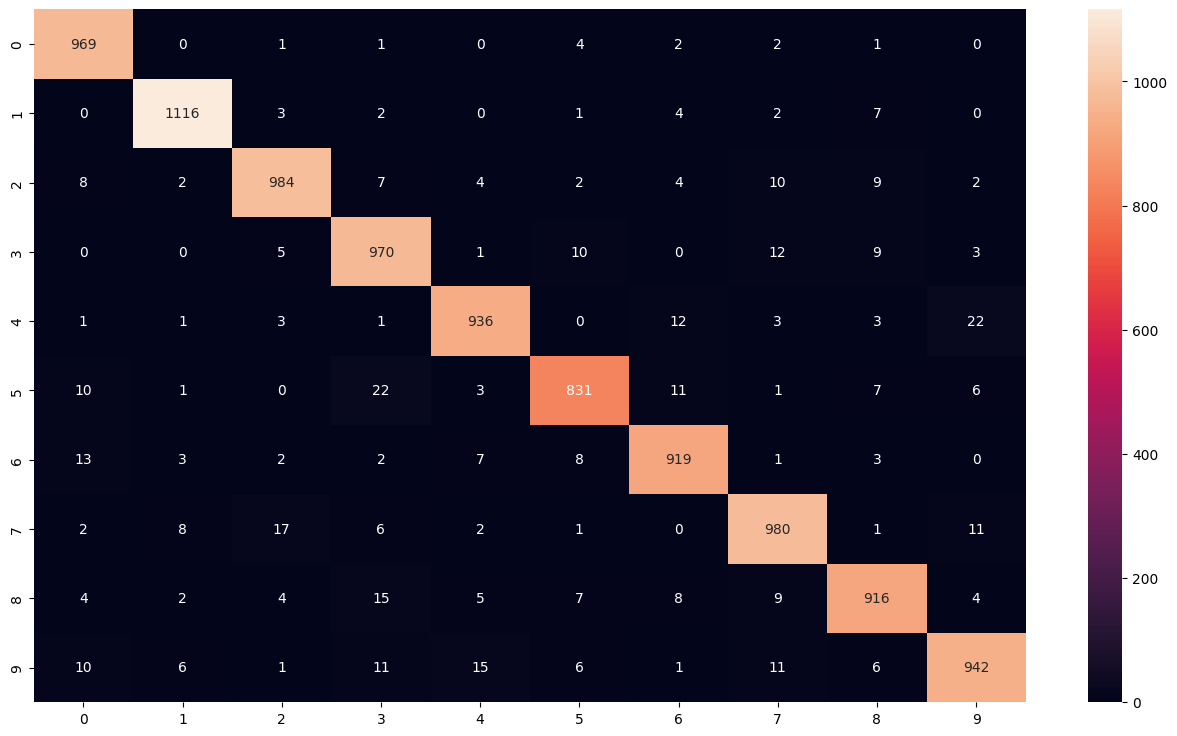

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d')

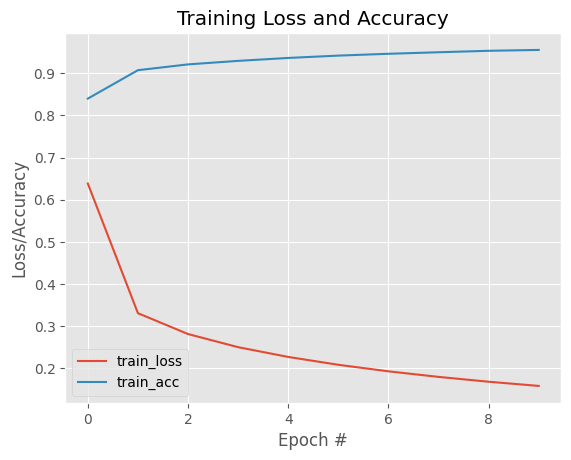

In [10]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()